### Projeto 2: Previsao do preco da Dogecoin para um intervalo de uma semana

In [1]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Selecionando um intervalo relevante de 6 meses
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-12-01', end='2021-06-06')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397


Text(0, 0.5, 'Preco em $ USD')

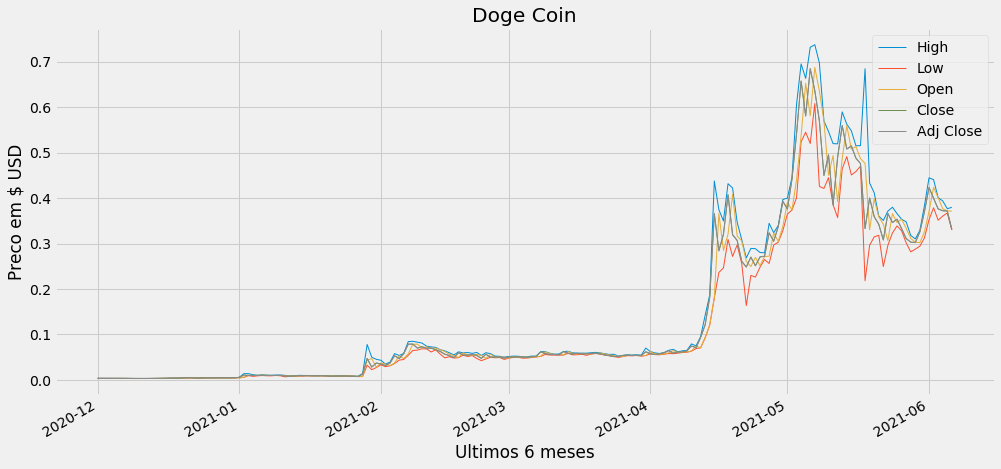

In [3]:
teste = df
teste = teste.drop(["Volume"], axis=1) #Remover a coluna Volume para nao distorcer o grafico.
plt.style.use('fivethirtyeight')
teste.plot(figsize=(15,7.5), linewidth=1) # plota o grafico com valores da dogecoin nos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("Ultimos 6 meses")
plt.ylabel("Preco em $ USD")

Text(0, 0.5, 'Preco em $ USD')

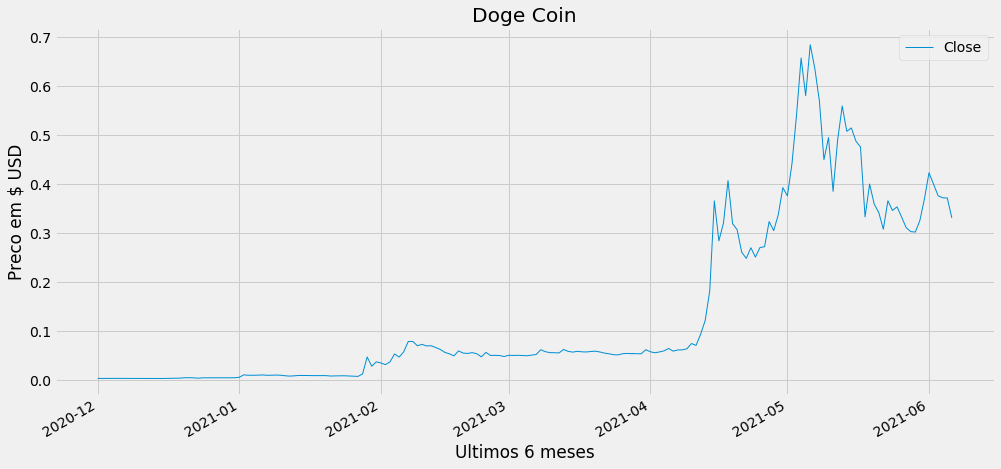

In [4]:
doge = df
doge = doge.loc[: ,["Close"]] #pega somente os valores de fechamento
plt.style.use('fivethirtyeight')
doge.plot(figsize=(15,7.5),linewidth=1); # plot dos valores de fechamento dos ultimos 6 meses
plt.title("Doge Coin")
plt.xlabel("Ultimos 6 meses")
plt.ylabel("Preco em $ USD")

In [5]:
doge.head() # valores de fechamento com index Data de fechamento

,Close
Date,
2020-12-01,0.003335
2020-12-02,0.003374
2020-12-03,0.003428
2020-12-04,0.003298
2020-12-05,0.003397


In [6]:
# Prever n dias no futuro
#Selecionamos 30 dias dentro do periodo pois a moeda é muito valotil
#e nesse periodo sofreu muita manipulacao de preco
predic_day = 30 

doge["Prediction"] = doge[["Close"]].shift(-predic_day) # Cria uma coluna Predction com valores 7 dias adiantado

In [7]:
doge.head()

,Close,Prediction
Date,,
2020-12-01,0.003335,0.004682
2020-12-02,0.003374,0.005685
2020-12-03,0.003428,0.010615
2020-12-04,0.003298,0.009771
2020-12-05,0.003397,0.009767


In [8]:
doge.tail() #Como a coluna Prediction esta adiantada em 30 dias, as ultimas 7 linhas estao vazias, reservadas para a predicao

,Close,Prediction
Date,,
2021-06-02,0.399963,NaN
2021-06-03,0.376323,NaN
2021-06-04,0.372177,NaN
2021-06-05,0.371807,NaN
2021-06-06,0.331050,NaN


In [9]:
# data Set independente
X = np.array(doge.drop(["Prediction"], 1)) #remove os valores da coluna, qual ira conter os dados que estamos procurando
X = X[:len(doge)-predic_day] # remove a ultima linha da previsao, pois esta deve estar vazia, por nao conter mais dados a ser previstos
X

array([[0.003335  ],
       [0.003374  ],
       [0.003428  ],
       [0.003298  ],
       [0.003397  ],
       [0.003388  ],
       [0.003342  ],
       [0.003179  ],
       [0.003158  ],
       [0.003105  ],
       [0.003079  ],
       [0.003163  ],
       [0.003256  ],
       [0.003231  ],
       [0.003206  ],
       [0.003416  ],
       [0.00373   ],
       [0.003858  ],
       [0.003927  ],
       [0.004625  ],
       [0.004787  ],
       [0.004508  ],
       [0.003768  ],
       [0.00457   ],
       [0.004582  ],
       [0.004494  ],
       [0.004548  ],
       [0.004592  ],
       [0.004486  ],
       [0.004636  ],
       [0.004682  ],
       [0.005685  ],
       [0.010615  ],
       [0.009771  ],
       [0.009767  ],
       [0.00992   ],
       [0.010465  ],
       [0.009742  ],
       [0.009846  ],
       [0.010194  ],
       [0.00986   ],
       [0.008835  ],
       [0.008063  ],
       [0.008616  ],
       [0.009397  ],
       [0.009369  ],
       [0.009265  ],
       [0.009

In [10]:
# data set independente 
y = np.array(doge["Prediction"]) # pega os dados da coluna Prediction
y = y[:-predic_day] # pegar todos os daos menos o n+1 (N é o numero de dias)
y

array([0.004682  , 0.005685  , 0.010615  , 0.009771  , 0.009767  ,
       0.00992   , 0.010465  , 0.009742  , 0.009846  , 0.010194  ,
       0.00986   , 0.008835  , 0.008063  , 0.008616  , 0.009397  ,
       0.009369  , 0.009265  , 0.009067  , 0.009171  , 0.009098  ,
       0.00906   , 0.008166  , 0.008524  , 0.008579  , 0.008727  ,
       0.008383  , 0.008255  , 0.007482  , 0.012555  , 0.047162  ,
       0.028176  , 0.037196  , 0.034875  , 0.03152   , 0.03712   ,
       0.053289  , 0.046935  , 0.057595  , 0.078782  , 0.078825  ,
       0.07007   , 0.072896  , 0.069676  , 0.070069  , 0.06645   ,
       0.062537  , 0.056591  , 0.05352   , 0.049376  , 0.059541  ,
       0.055139  , 0.054384  , 0.05598   , 0.053725  , 0.047392  ,
       0.056555  , 0.050167  , 0.05048   , 0.050083  , 0.048052  ,
       0.050599  , 0.050262  , 0.050592  , 0.050048  , 0.049609  ,
       0.050984  , 0.052122  , 0.061949  , 0.057998  , 0.056004  ,
       0.055918  , 0.055349  , 0.062432  , 0.058592  , 0.05708

In [11]:
from sklearn.model_selection import train_test_split # separa os dados de trainamento(80%) e dados de teste (20%).

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [12]:
# lista de predicao para previsao, contendo os precos dos ultimos 7 dias do data set original
prediction_days_array = np.array(doge.drop(["Prediction"], 1))[-predic_day:] # remove a coluna predicao para usar somente A coluna Close
prediction_days_array

array([[0.57007003],
       [0.44996399],
       [0.495231  ],
       [0.38537601],
       [0.490374  ],
       [0.55960399],
       [0.507972  ],
       [0.51489502],
       [0.487892  ],
       [0.47611499],
       [0.333123  ],
       [0.40019399],
       [0.359382  ],
       [0.34237099],
       [0.30807099],
       [0.366162  ],
       [0.346302  ],
       [0.35369301],
       [0.33294499],
       [0.311205  ],
       [0.30311   ],
       [0.30222401],
       [0.32580999],
       [0.37007701],
       [0.423374  ],
       [0.39996299],
       [0.37632301],
       [0.372177  ],
       [0.37180701],
       [0.33105001]])

In [13]:
from sklearn.svm import SVR # importa a ferramenta Suport Vector Regression para 
# Cria e treina a ferramenta de regressao
svr_rbf = SVR(kernel="rbf", C=1e3, gamma="auto")
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma='auto')

In [14]:
# pontuacao de confianca do modelo
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
svr_rbf_confidence

0.38409951394992736

In [35]:
# exibir os dados que foram preditos no teste
svm_predction = svr_rbf.predict(x_test)

print("valores previstos no teste:")
print(svm_predction) # printa os valores previstos

print()

print("Valores reais/atuais:")
print(y_test) # printa os valores atuais

valores previstos no teste:
[0.16836266 0.02753933 0.04482383 0.02774084 0.02933012 0.16556482
 0.16844591 0.41162676 0.16329705 0.15200718 0.30961863 0.03173249
 0.18174573 0.16331342 0.02766676 0.03202706 0.17404492 0.03176195
 0.20001383 0.19065618 0.41353097 0.0467728  0.17556714 0.17957005
 0.4082452  0.36288936 0.02832428 0.02959614 0.15639425 0.16466328
 0.17304848 0.41385136]

Valores reais/atuais:
[0.053952   0.008835   0.05352    0.008616   0.008524   0.074649
 0.057653   0.47611499 0.27067399 0.057404   0.39996299 0.008727
 0.070767   0.054962   0.009397   0.028176   0.68477702 0.007482
 0.38537601 0.057088   0.30311    0.057595   0.65763301 0.63643903
 0.346302   0.423374   0.010615   0.009067   0.27021199 0.306925
 0.093445   0.487892  ]


In [36]:
#Previsao para os proximos 7 dias 
svm_predction = svr_rbf.predict(prediction_days_array) #last 7 days

print("Valores preditos com dados ainda nao vistis pelo modelo:")
print(svm_predction) #predito

print()

print("valores reais")
print(doge.tail(predic_day)) #preco atual


Valores preditos com dados ainda nao vistis pelo modelo:
[0.29713472 0.35835452 0.33326952 0.3911433  0.33592558 0.30142481
 0.32641296 0.32277199 0.33728994 0.3438117  0.4090957  0.38435045
 0.4014169  0.40674316 0.41327295 0.39896662 0.40562309 0.40333393
 0.40913695 0.4129391  0.41368372 0.41374162 0.41065985 0.39747401
 0.37271011 0.38446071 0.39498161 0.39665095 0.39679708 0.40956641]

valores reais
               Close  Prediction
Date                            
2021-05-08  0.570070         NaN
2021-05-09  0.449964         NaN
2021-05-10  0.495231         NaN
2021-05-11  0.385376         NaN
2021-05-12  0.490374         NaN
2021-05-13  0.559604         NaN
2021-05-14  0.507972         NaN
2021-05-15  0.514895         NaN
2021-05-16  0.487892         NaN
2021-05-17  0.476115         NaN
2021-05-18  0.333123         NaN
2021-05-19  0.400194         NaN
2021-05-20  0.359382         NaN
2021-05-21  0.342371         NaN
2021-05-22  0.308071         NaN
2021-05-23  0.366162         Na

In [37]:
data = doge.tail(predic_day)
data = data.reset_index(drop=False)
data = data.loc[:, ["Date", "Close"]]

In [40]:
df = web.DataReader('DOGE-USD', data_source='yahoo', start='2021-05-8', end='2021-06-06') #Selecionando um intervalo relevante de 6 meses

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data.Date, svm_predction, label="Valor Previsto", linewidth=1, color='r')
plt.plot(df.Close, label="Valor Real", linewidth=1, color='b')
plt.xlabel("Periodo de 30 dias")
plt.ylabel("Valor em $USD")
plt.title("Doge Coin: Valor previsto x Valor Real")
plt.legend()
plt.show();



NameError: name 'data' is not defined

<Figure size 864x432 with 0 Axes>